In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd


pd.set_option('display.max_columns', None)

In [19]:
from shapely import wkt


In [22]:
gdf_summary = gpd.read_parquet("bases_analises/gdf_bootstrap_regioes.parquet")


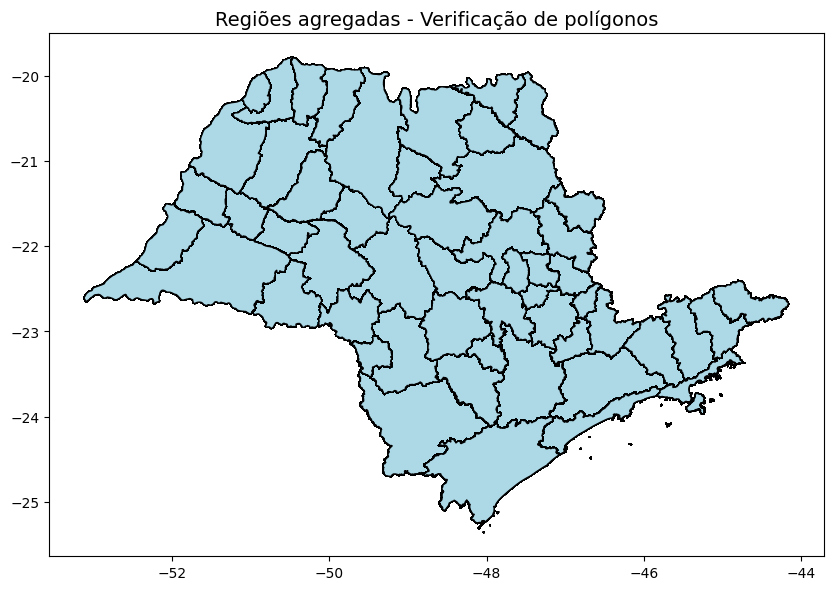

In [25]:
fig, ax = plt.subplots(figsize=(10, 8))
gdf_summary.plot(ax=ax, color='lightblue', edgecolor='k')
ax.set_title("Regiões agregadas - Verificação de polígonos", fontsize=14)
plt.show()

In [27]:
gdf_summary.head(1)

,cod_regiao,nome_regiao,coluna,ano,media_mean,media_std,media_ci_lower,media_ci_upper,mediana_mean,mediana_std,mediana_mediana,p25_mediana,p75_mediana,inc_media_amp,inc_media_cv,skew_media,kurt_media,n_peaks,diagnostico_estabilidade,diagnostico_assimetria,diagnostico_curtose,diagnostico_multimodal,valor_representativo,geometry
0,350001,São Paulo,ipca_alimentos_bebidas,2018,4.030782,0.0,4.030782,4.030782,4.030782,0.0,4.030782,4.030782,4.030782,0.0,4.406978e-16,1.001503,-2.004012,0.0,Alta estabilidade,Assimétrica à direita,Platicúrtica (achatada),Multimodal,4.030782,"POLYGON ((-47.00221 -24.05627, -47.00285 -24.0..."


In [31]:
df_wide = gdf_summary.pivot_table(
    index=['ano', 'cod_regiao', 'nome_regiao', 'geometry'],
    columns='coluna',
    values='mediana_mean'
).reset_index()

In [34]:
type(df_wide['geometry'])

pandas.core.series.Series

In [35]:
df_wide = gpd.GeoDataFrame(df_wide, geometry='geometry')

## Setting interesting variables to make analyses


In [ ]:
# voltar e incluir o emprego_formal_percapta

In [41]:
interesting_variables = ['per_capita_massa_rendimentos','per_capita_pib', 'per_capita_pib_agropecuaria',
'per_capita_pib_industria', 'perc_Ido_BPC','perc_Pop_65_mais','perc_pes_insc_cadun' , 'taxa_qtd_formal_Indústria_de_Transformação', 'taxa_qtd_formal_escolaridade_4']

ipca_alimentos_bebidas	ipca_artigos_residencia	ipca_comunicacao	ipca_despesas_pessoais	ipca_educacao	ipca_geral
ipca_habitacao	ipca_saude_cuidados_pessoais	ipca_transportes	ipca_vestuario	per_capita_massa_rendimentos
per_capita_pib	per_capita_pib_agropecuaria	per_capita_pib_impostos_liq_sub	per_capita_pib_industria
per_capita_pib_servicos	per_capita_pib_servicos_adm_publica	per_capita_pib_valor_add	perc_65_menos_Idoso_BPC	
perc_Ido_BPC	perc_PCD_BPC	perc_Pes_PBF	perc_Pop_65_mais	perc_cadunicoF_CAD_EP	perc_cadunicoFam_PBF
perc_n_fam_rua	perc_pes_insc_cadun	perc_pes_rf_ate_meio_sm	taxa_qtd_formal_Administração_Pública
taxa_qtd_formal_Agropecuária	taxa_qtd_formal_Alojamento_e_Alimentação	taxa_qtd_formal_Artes_e_Cultura
taxa_qtd_formal_Atividades_Imobiliárias	taxa_qtd_formal_Atividades_Profissionais_e_Técnicas
taxa_qtd_formal_Comércio	taxa_qtd_formal_Construção	taxa_qtd_formal_Educação
taxa_qtd_formal_Eletricidade_e_Gás	taxa_qtd_formal_Indústria_de_Transformação	taxa_qtd_formal_Indústrias_Extrativas
taxa_qtd_formal_Informação_e_Comunicação	taxa_qtd_formal_Organismos_Internacionais	taxa_qtd_formal_Outros_Serviços
taxa_qtd_formal_Saneamento_e_Resíduos	taxa_qtd_formal_Saúde	taxa_qtd_formal_Serviços_Administrativos
taxa_qtd_formal_Serviços_Domésticos	taxa_qtd_formal_Serviços_Financeiros	taxa_qtd_formal_Transporte_e_Correios
taxa_qtd_formal_escolaridade_0	taxa_qtd_formal_escolaridade_1	taxa_qtd_formal_escolaridade_2
taxa_qtd_formal_escolaridade_3	taxa_qtd_formal_escolaridade_4

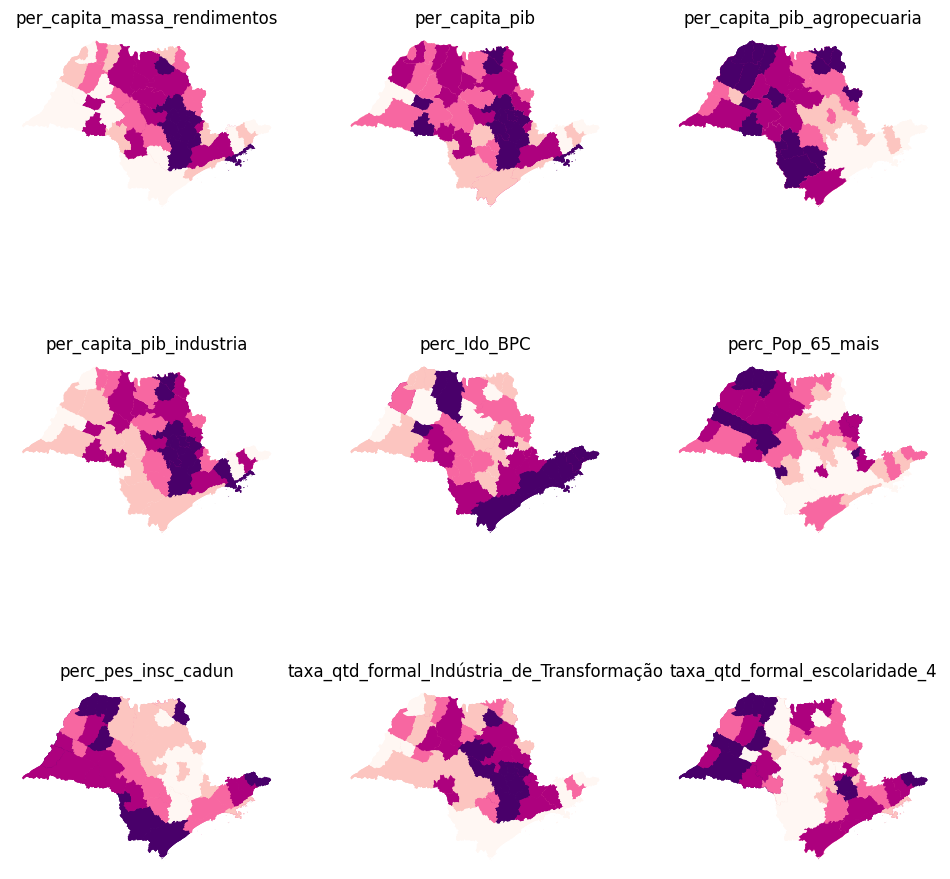

In [42]:
f, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

axs = axs.flatten()

for i, col in enumerate(interesting_variables):
    # select the axis where the map will go
    ax = axs[i]
    # Plot the map
    df_wide.plot(
        column=col,
        ax=ax,
        scheme="Quantiles",
        linewidth=0,
        cmap="RdPu",
    )
    ax.set_axis_off()
    ax.set_title(col)
plt.show()